In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')
stop = set(stopwords.words('english'))

#Load Dataset
political = pd.read_csv("datasets/political_leaning.csv")



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\20220870\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
print("Dataset Overview:")
print(political.info())
print(political.describe())

print("\nMissing Values:")
missing_values = political.isnull().sum()
print(missing_values)

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57231 entries, 0 to 57230
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   auhtor_ID          57231 non-null  object
 1   post               57231 non-null  object
 2   political_leaning  57231 non-null  object
dtypes: object(3)
memory usage: 1.3+ MB
None
         auhtor_ID                                               post  \
count        57231                                              57231   
unique        2178                                              57184   
top     t2_sldqd7t  cum cum cum cum cum cum cum cum cum cum cum cu...   
freq          1683                                                 48   

       political_leaning  
count              57231  
unique                 3  
top               center  
freq               25201  

Missing Values:
auhtor_ID            0
post                 0
political_leaning    0
dtype: 

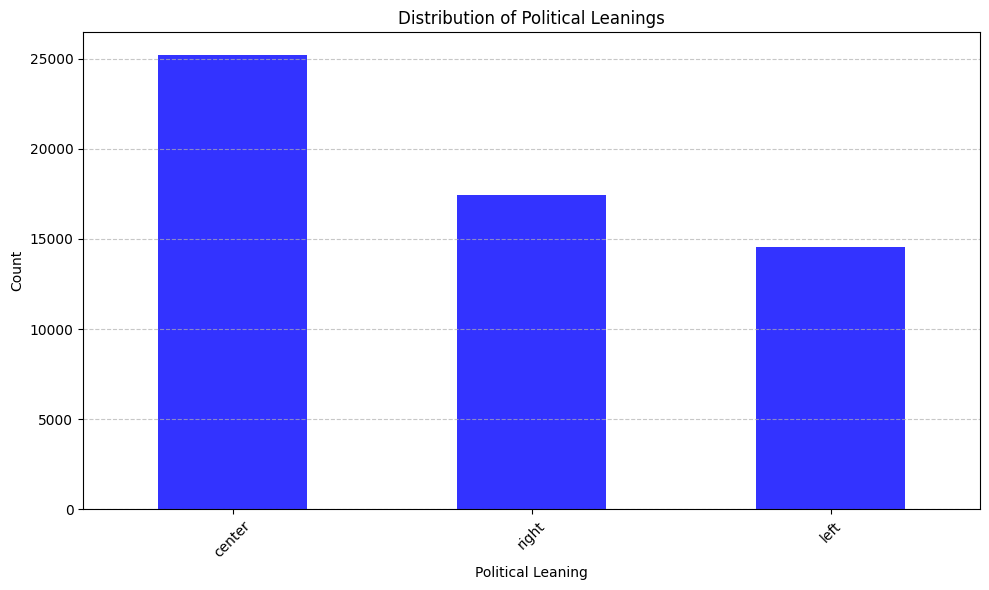

In [3]:
political_counts = political['political_leaning'].value_counts()
plt.figure(figsize=(10, 6))
political_counts.plot(kind='bar', color='blue', alpha=0.8)
plt.title("Distribution of Political Leanings")
plt.xlabel("Political Leaning")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

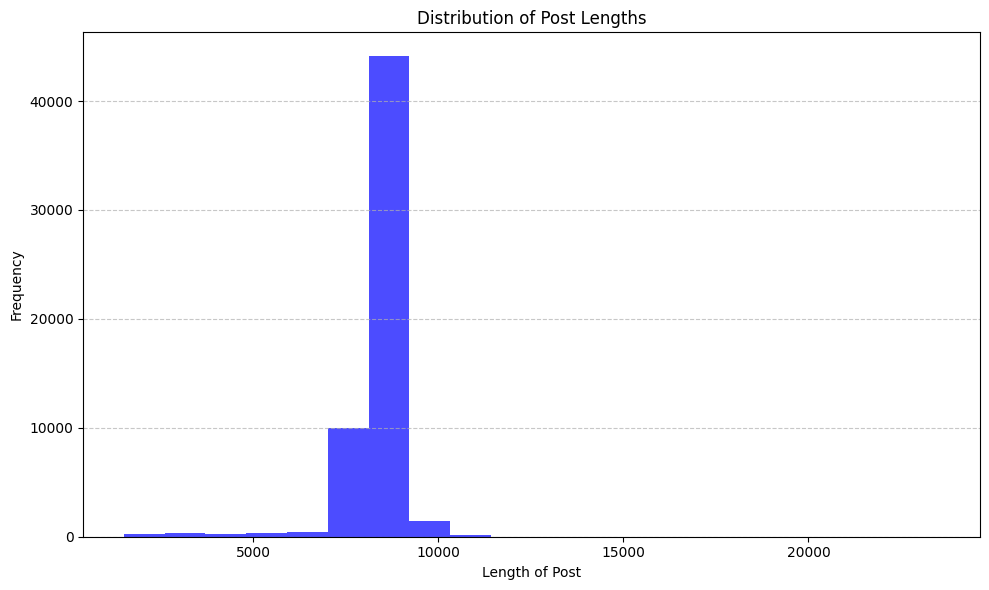


Post Length Statistics:
count    57231.000000
mean      8320.036728
std        813.588812
min       1500.000000
25%       8162.000000
50%       8386.000000
75%       8623.000000
max      23533.000000
Name: post_length, dtype: float64


In [4]:
political['post_length'] = political['post'].str.len()
plt.figure(figsize=(10, 6))
plt.hist(political['post_length'], bins=20, alpha=0.7, color='blue')
plt.title("Distribution of Post Lengths")
plt.xlabel("Length of Post")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
print("\nPost Length Statistics:")
print(political['post_length'].describe())


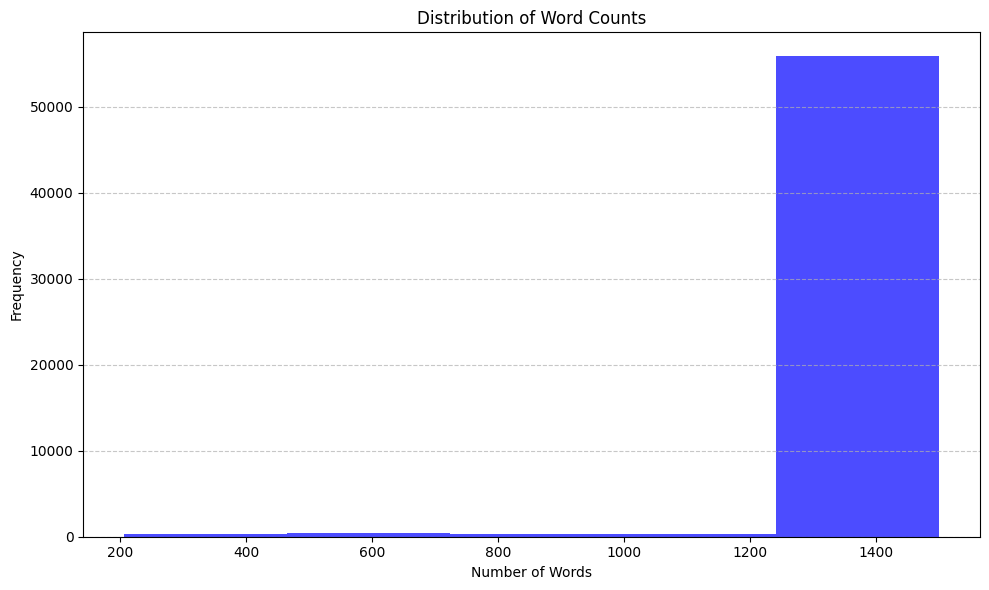


Word Count Statistics:
count    57231.000000
mean      1480.917125
std        124.092390
min        206.000000
25%       1500.000000
50%       1500.000000
75%       1500.000000
max       1500.000000
Name: word_count, dtype: float64


In [5]:
#Word Count Analysis
political['word_count'] = political['post'].str.split().map(len)
plt.figure(figsize=(10, 6))
plt.hist(political['word_count'], bins=5, alpha=0.7, color='blue')
plt.title("Distribution of Word Counts")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
print("\nWord Count Statistics:")
print(political['word_count'].describe())


In [6]:
#Vocabulary Size and Word Frequency Analysis
def process_corpus_without_stopwords(df, column, stopwords):
    corpus = []
    new = df[column].dropna().str.split()  # Split text into words
    new = new.values.tolist()  # Convert to list of lists
    corpus = [word.lower() for sentence in new for word in sentence if word.lower() not in stopwords]
    return corpus

political_corpus = process_corpus_without_stopwords(political, 'post', stop)
unique_words = set(political_corpus)
print(f"\nVocabulary Size (Unique Words): {len(unique_words)}")



Vocabulary Size (Unique Words): 1785074



Top 20 Words (Excluding Stop Words):
like: 370651
people: 305576
would: 253108
one: 218253
get: 214258
think: 191847
even: 179895
cum: 167683
also: 146127
it’s: 134954
good: 128698
i'm: 128018
know: 125566
really: 124629
make: 123875
still: 117143
want: 111462
much: 109325
that's: 105948
could: 102965


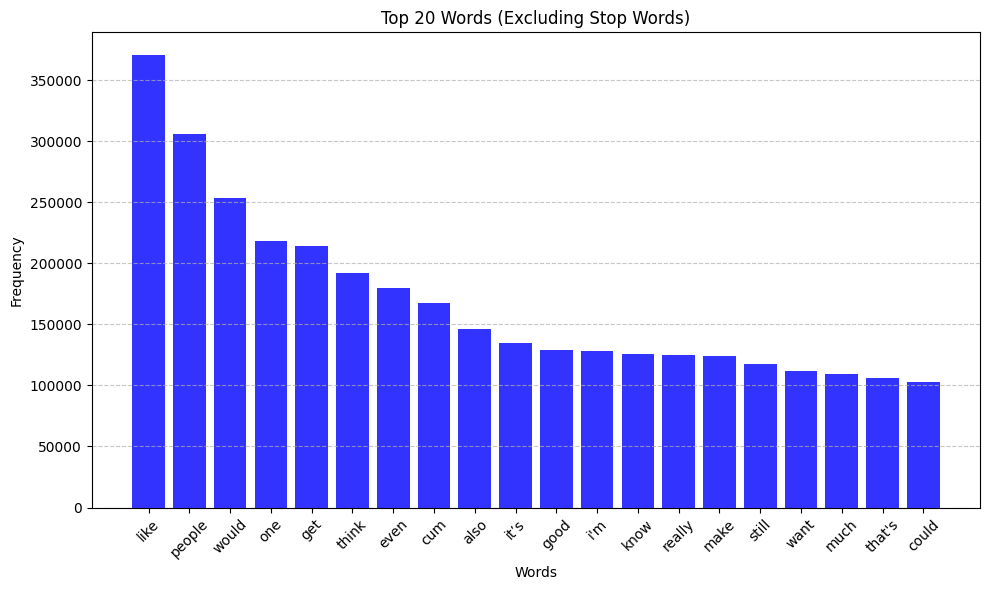

In [7]:
word_counts = Counter(political_corpus)
top_20_words = word_counts.most_common(20)
print("\nTop 20 Words (Excluding Stop Words):")
for word, count in top_20_words:
    print(f"{word}: {count}")

#Plot Top 20 Words
words, counts = zip(*top_20_words)
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='blue', alpha=0.8)
plt.title("Top 20 Words (Excluding Stop Words)")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [8]:
#Word Frequency by Class**
def class_word_frequency(df, column, class_column):
    class_counters = {}
    for label in df[class_column].unique():
        class_texts = df[df[class_column] == label][column].dropna().str.split()
        corpus = [word.lower() for sentence in class_texts for word in sentence if word.lower() not in stop]
        class_counters[label] = Counter(corpus)
    return class_counters


In [9]:
class_frequencies = class_word_frequency(political, 'post', 'political_leaning') #word frequency for each class
for leaning, freq in class_frequencies.items():
    print(f"\nTop Words for '{leaning}':")
    print(freq.most_common(10))



Top Words for 'right':
[('cum', 162558), ('like', 115900), ('people', 93439), ('would', 79484), ('get', 69891), ('one', 66022), ('think', 57151), ('even', 52363), ('it’s', 42278), ('also', 40206)]

Top Words for 'center':
[('like', 157866), ('people', 134105), ('would', 109537), ('one', 96213), ('get', 89999), ('think', 85407), ('even', 81893), ('also', 70182), ('sunflower', 64676), ('it’s', 62307)]

Top Words for 'left':
[('like', 96885), ('people', 78032), ('would', 64087), ('one', 56018), ('get', 54368), ('think', 49289), ('even', 45639), ("i'm", 37201), ('also', 35739), ('really', 35020)]


In [10]:
#Vocabulary Size by Class**
vocab_size_by_class = {leaning: len(set([word for word, count in freq.items()])) for leaning, freq in class_frequencies.items()}
print("\nVocabulary Size by Class:")
for leaning, size in vocab_size_by_class.items():
    print(f"{leaning}: {size}")


Vocabulary Size by Class:
right: 754313
center: 981022
left: 713336


In [11]:

#Word Overlap Across Classes**
class_vocabularies = {leaning: set([word for word, count in freq.items()]) for leaning, freq in class_frequencies.items()}
common_words = set.intersection(*class_vocabularies.values())
print(f"\nNumber of Common Words Across Classes: {len(common_words)}")
print(f"Sample Common Words: {list(common_words)[:10]}")


Number of Common Words Across Classes: 218290
Sample Common Words: ['modmail', 'wetenschappelijk', 'grasp.', '$11.25', 'heavy?', 'arrived', 'frolic', 'involved.”', 'colluding', 'bream']


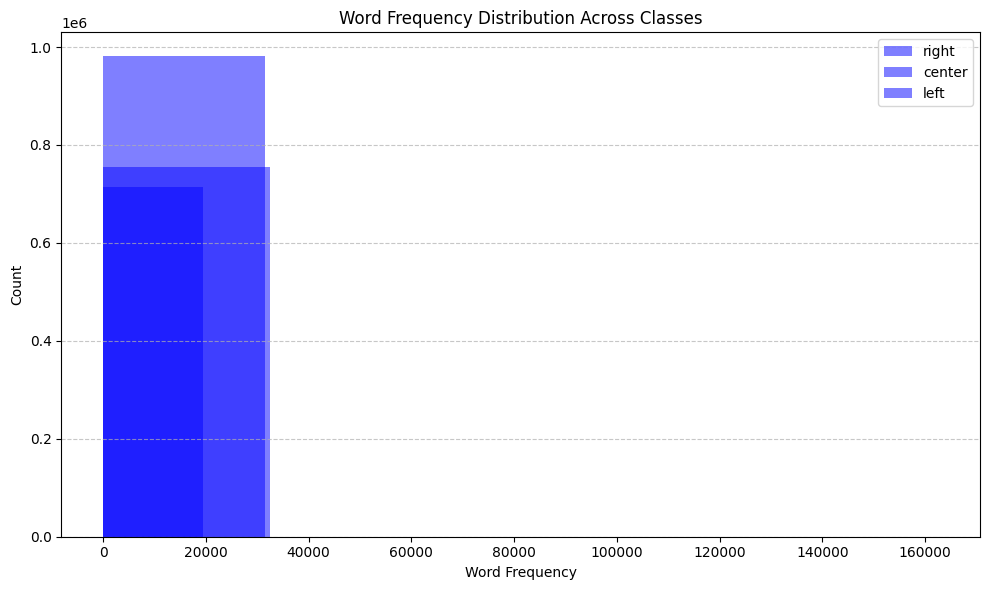

In [12]:
#Across Classes
plt.figure(figsize=(10, 6))
for leaning, freq in class_frequencies.items():
    word_counts = list(freq.values())
    plt.hist(word_counts, bins=5, alpha=0.5, label=leaning, color='blue')

plt.title("Word Frequency Distribution Across Classes")
plt.xlabel("Word Frequency")
plt.ylabel("Count")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

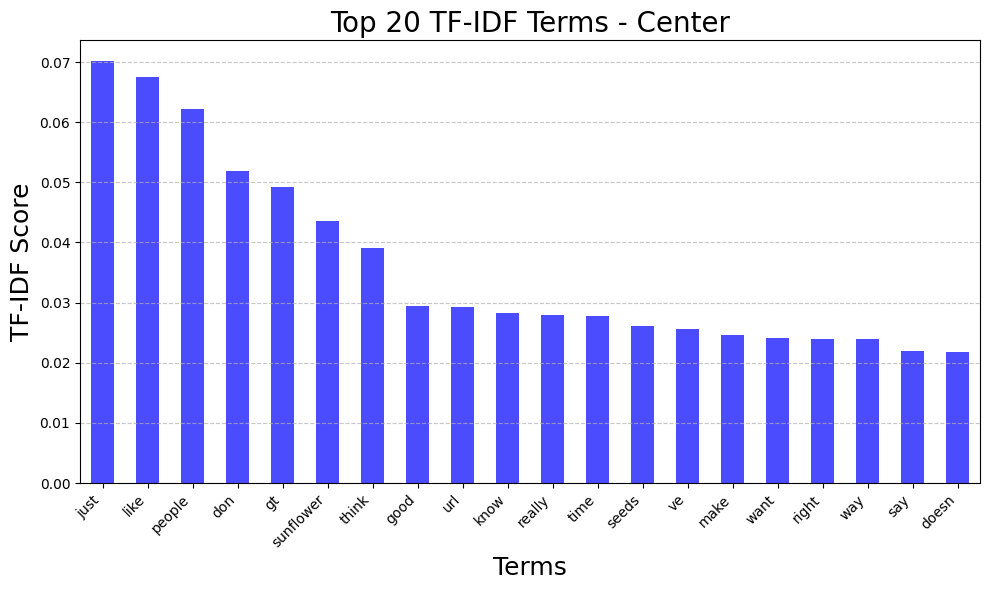

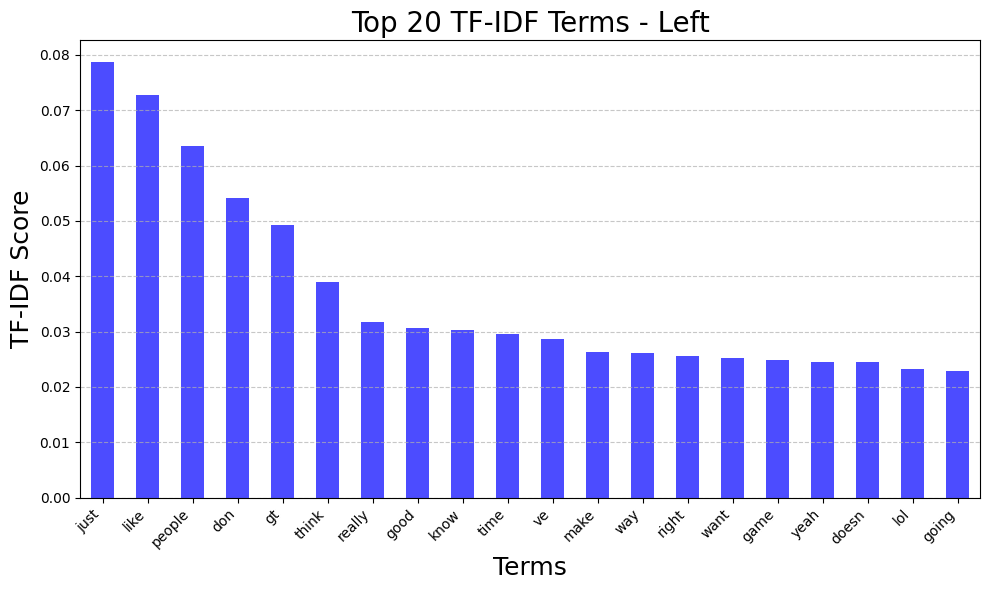

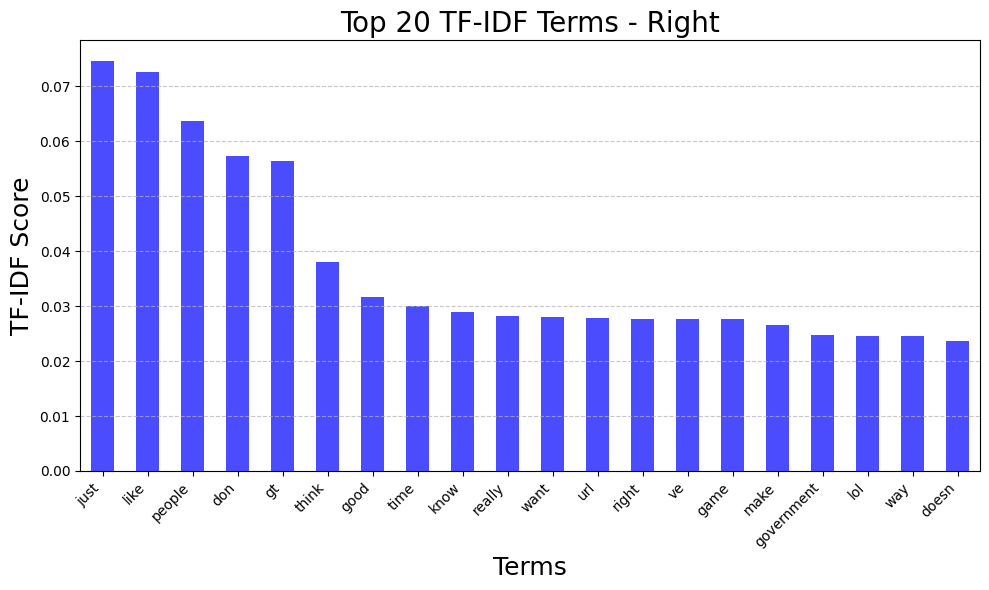

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import matplotlib.pyplot as plt

#Function to compute and visualize top TF-IDF terms per class
def tfidf_analysis(df, text_column, class_column, top_n=20):
    vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(df[text_column].dropna())
    feature_names = vectorizer.get_feature_names_out()
    
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)
    tfidf_df[class_column] = df[class_column].values  #add class labels to the DataFrame
    
    tfidf_class_means = tfidf_df.groupby(class_column).mean() #compute average TF-IDF scores per class
    top_terms_per_class = {}
    for label in tfidf_class_means.index:
        top_terms = tfidf_class_means.loc[label].nlargest(top_n)
        top_terms_per_class[label] = top_terms
    
    for label, terms in top_terms_per_class.items():
        plt.figure(figsize=(10, 6))
        terms.plot(kind='bar', alpha=0.7, color='blue')
        plt.title(f"Top {top_n} TF-IDF Terms - {label.capitalize()}", fontsize=20)
        plt.xlabel("Terms", fontsize=18)
        plt.ylabel("TF-IDF Score", fontsize=18)
        plt.xticks(rotation=45, ha='right')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

tfidf_analysis(political, text_column='post', class_column='political_leaning')
